In [16]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import glob

from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible

from csbdeep.models import Config, UpsamplingCARE

In [13]:
basedirLow = '/data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Low/'
basedirResults = '/data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Results/'
ModelName = 'JesusCareCADGFPExcellentupsampling3D'
BaseDir = 'models'


['Massrename.sh', 'MassLowrename.sh', 'test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s5_t1.tif', 'test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s3_t1.tif', '._Massrename.sh', 'test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s1_t1.tif', 'test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s2_t1.tif', '._MassLowrename.sh', 'test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s6_t1.tif', 'test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s4_t1.tif']


total number of images to be restored =  6
image size = (25, 2048, 2048)
image axes = ZYX


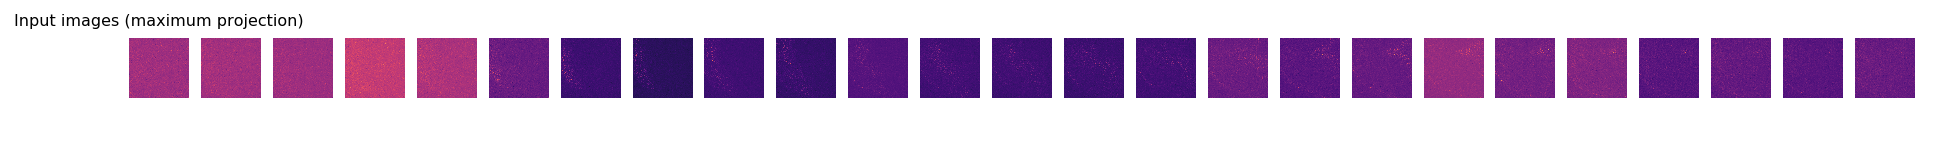

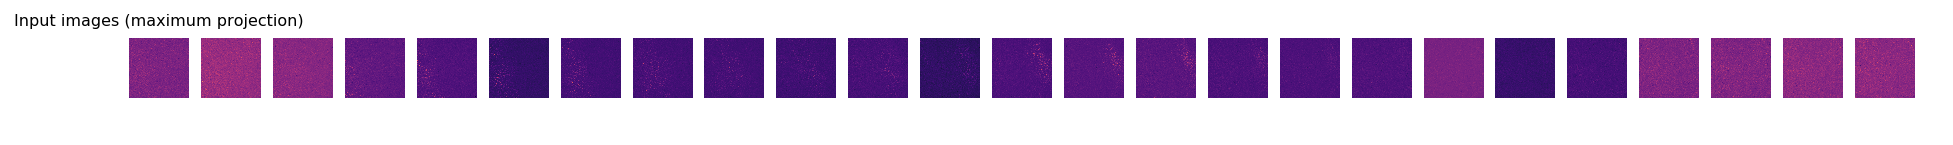

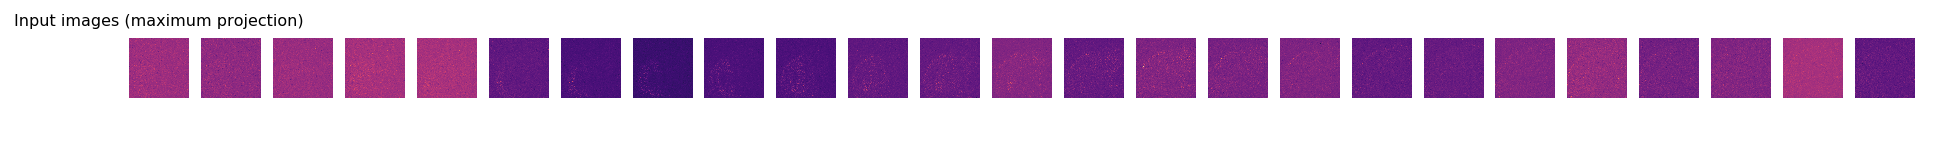

In [14]:
Raw_path = os.path.join(basedirLow, '*tif')
Rawfiles = []
Names = []
filesRaw = glob.glob(Raw_path)
for fname in filesRaw:
        x = imread(fname)
        Names.append(fname)
        
        Rawfiles.append(x)
Rawfiles.sort
Names.sort
axes = 'ZYX'
print('total number of images to be restored = ', len(Rawfiles))
print('image size =', x.shape)
print('image axes =', axes)
#plot first three file data
count = min(3, len(Rawfiles))

for i in range(0, count):
    plt.figure(figsize = (16,10))
    plot_some(np.stack([Rawfiles[i]]), title_list= [[ 'Input images (maximum projection)' ]])

In [17]:
model = UpsamplingCARE(config=None, name=ModelName, basedir='models')

Loading network weights from 'weights_best.h5'.


In [20]:
%%time
Restoredfiles = []
for x in Rawfiles:
    restored = model.predict(x, axes, 1, n_tiles=8)
    Restoredfiles.append(restored)

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/utils/utils.py:209: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]


Out of memory, retrying with n_tiles = 16


/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/data/prepare.py:284: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[crop]


Out of memory, retrying with n_tiles = 16
Out of memory, retrying with n_tiles = 16
Out of memory, retrying with n_tiles = 16
Out of memory, retrying with n_tiles = 16
Out of memory, retrying with n_tiles = 16
CPU times: user 6min 42s, sys: 3min 3s, total: 9min 46s
Wall time: 10min 3s


In [24]:
Path(basedirResults).mkdir(exist_ok = True)
for i in range(0, len(Names)):
   print('Saving file' +  basedirResults + os.path.basename(Names[i]))
   save_tiff_imagej_compatible((basedirResults  + os.path.basename(Names[i])), Restoredfiles[i], axes)

Saving file/data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Results/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s5_t1.tif


/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/utils/utils.py:209: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]


Saving file/data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Results/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s3_t1.tif
Saving file/data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Results/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s1_t1.tif
Saving file/data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Results/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s2_t1.tif
Saving file/data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Results/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s6_t1.tif
Saving file/data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Results/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s4_t1.tif


Filename =  /data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Low/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s5_t1.tif
Filename =  /data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Low/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s3_t1.tif
Filename =  /data/u934/service_imagerie/v_kapoor/JesusCARE/Test/Low/test_cadgfp3x_20_wDeepCSU-TRIPLE-488_s1_t1.tif


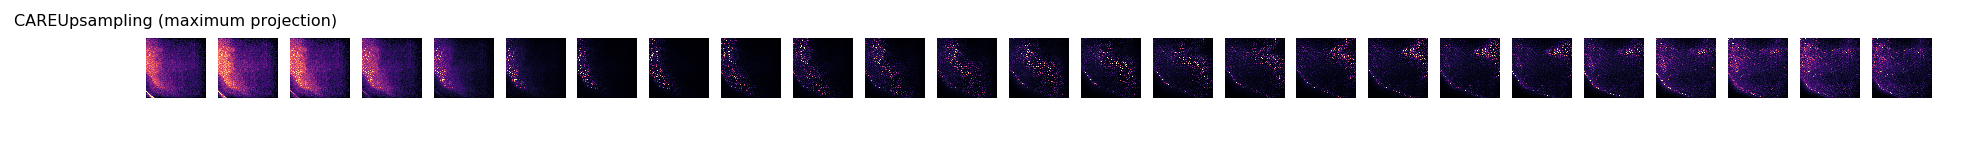

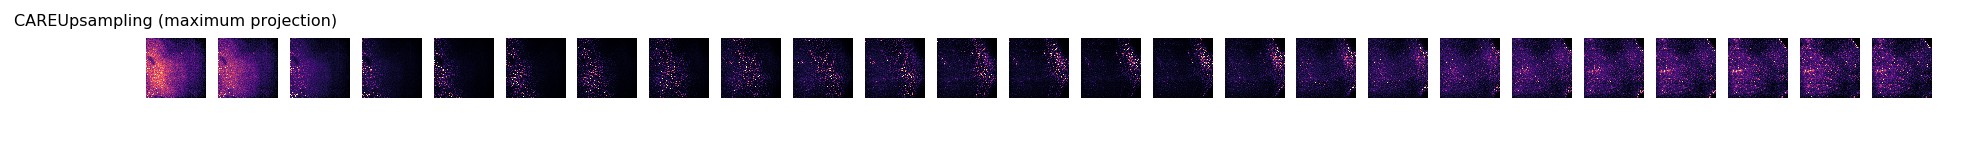

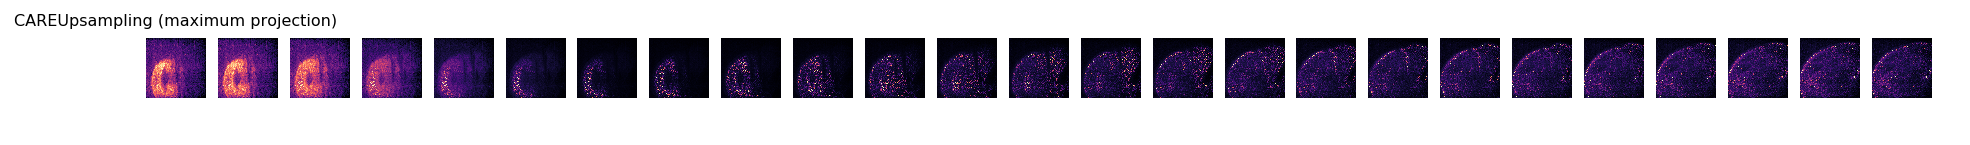

In [25]:
#Plot some restored files
for  i  in  range(0,  count):
      plt.figure(figsize=(16,10))
      plot_some(np.stack([Restoredfiles[i]]),
          title_list=[['CAREUpsampling (maximum projection)']], 
          pmin=2,pmax=99.8);
      print('Filename = ', Names[i])